# Z-Scores

One of the most powerful operations that you can perform when you have a normal (also known as Gaussian) distribution is the calculation of z-scores.

What are z-scores and why are they important in statistics? A z-score (which you'll also see as standard score) is an indicator **how many standard deviations** a data point is from the mean of the distribution it came from. In other words, a z-score tells us **how usual or unusual a data point is**.

With a normal distribution, the **standard deviation** is a measure of how **wide** the distribution is. That is, most data (68%) is within the range from one standard deviation to the left and one standard deviation to the right of the mean, almost all data (95%) is within two standard deviations of the mean, and data that is far outside that range can be considered outliers.

So, what do we need to get started? First, we need to generate a **normal distribution** via sampling (if the distribution is not already normal) and then we need to calculate the mean and standard deviation. We also need the given value (or several values) from the dataset for which we want to calculate a z-score (or several z-scores).

Given all this information, calculating a z-score is straightforward:
<code><pre>x = value_from_dataset
mean = mean_of_dataset
std =  std_of_dataset
z_score  = (x - mean)/std
</pre></code>

Why did we subtract the mean and divide by the standard deviation? That's because to calculate a z-score, we need to **standardize** the normal distribution so we can work in the same scale for any dataset. First, we subtract the mean from that point, which gives us a number indicating how far to the left or right the data point is offset from the mean. Then, we dividing the result by the standard deviation, which scales the offset up or down to the **standard normal scale**.

Luckily for us, the **SciPy** package in Python provides us with a way to not only calculate a single z-score, but an entire array at once! Let's give this a look using the data of housefly wing lengths, since this data is already normally distributed.

0.0

count    101.0
mean      45.5
std        3.9
min       36.0
25%       43.0
50%       45.5
75%       48.0
max       55.0
dtype: float64

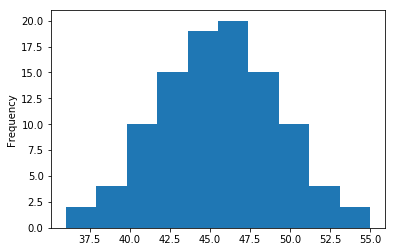

In [35]:
# Import the stats package from scipy as st
import scipy.stats as st
import pandas as pd
%matplotlib inline

housefly_data = pd.Series([36,37,38,38,39,39,40,40,40,40,41,41,41,41,41,41,42,42,42,42,42,42,42,43,43,43,43,43,43,43,43,44,44,44,44,44,44,44,44,44,45,45,45,45,45,45,45,45,45,45,45.5,46,46,46,46,46,46,46,46,46,46,47,47,47,47,47,47,47,47,47,48,48,48,48,48,48,48,48,49,49,49,49,49,49,49,50,50,50,50,50,50,51,51,51,51,52,52,53,53,54,55])

# Just to make sure that the data is not skewed, we can do two things, we can check the amount of skew by using the .skew() method

display(housefly_data.skew()) # We see that there is a skew of 0, meaning that it is balanced as a normal distribution on both

# Just to get the descriptive stats lets use the .describe() method to check on our mean, std and median
display(housefly_data.describe())

# Now, let's visualize it!
housefly_data.plot.hist()

In [29]:
# We can use SciPy's zscore function to calculate the z-score of every data point in one call
st.zscore(housefly_data)

array([-2.44804663, -2.19035751, -1.93266839, -1.93266839, -1.67497927,
       -1.67497927, -1.41729015, -1.41729015, -1.41729015, -1.41729015,
       -1.15960103, -1.15960103, -1.15960103, -1.15960103, -1.15960103,
       -1.15960103, -0.90191191, -0.90191191, -0.90191191, -0.90191191,
       -0.90191191, -0.90191191, -0.90191191, -0.6442228 , -0.6442228 ,
       -0.6442228 , -0.6442228 , -0.6442228 , -0.6442228 , -0.6442228 ,
       -0.6442228 , -0.38653368, -0.38653368, -0.38653368, -0.38653368,
       -0.38653368, -0.38653368, -0.38653368, -0.38653368, -0.38653368,
       -0.12884456, -0.12884456, -0.12884456, -0.12884456, -0.12884456,
       -0.12884456, -0.12884456, -0.12884456, -0.12884456, -0.12884456,
        0.        ,  0.12884456,  0.12884456,  0.12884456,  0.12884456,
        0.12884456,  0.12884456,  0.12884456,  0.12884456,  0.12884456,
        0.12884456,  0.38653368,  0.38653368,  0.38653368,  0.38653368,
        0.38653368,  0.38653368,  0.38653368,  0.38653368,  0.38

## Z-Scores to Probability

Ok so, we can use these to see how far each of our values are away from the mean based on standard deviation. But what can we do with this information? We can calculate both the cumulative distribution (which gives us the percentaile rank) and the survival (which will give us the opposite, the remaining percent outside of the observed percentile). You wil also see these referred to as the relative frequency.

These can be observed as the area of occurence under the curve of a normal distribution to the left of a data point (cumulative distribution) or to the right of a data point (survival). Remember that for probability the total area under the curve is 1.0 which represents all of the observed points of data occuring. 100/100 in this case or 100% of the datapoints being observed in that range.

Let's visualize this on some graphs of the standard normal distribution so it's easier to understand.

The total area under the curve is 1.0 for the whole graph:

<img src="z-1.gif"/>


Let's say we just want to get the relative frequency of observations **below** a z-score of `1.18`.

To compute the cumulative area to the **left** of a z-score, use the **cumulative density function** (a.k.a. **cdf**). The observed values are within the blue area below:

<img src="z-2.gif">

Now, let's say we get curious and want to know the exact opposite, that is, the relative frequency of observations **above** a z-score of `-1.48`?

To compute the cumulative area to the **right** of a z-score, use the **survival function** (a.k.a. **sf**). The observed results are within this blue area:

<img src="z-3.gif"/>

Let's finally get into some code so we can work with these new functions on our actual dataset!

In [30]:
import scipy.stats as st
# Example use:
# A Z-score of 1.64 == ~95% to the left, ~5% to the right

# To use the cumulative density function, use the following function
left_tail = st.norm.cdf(1.64)

# To get the survival, use this function
right_tail = st.norm.sf(1.64)

Just to make sure that our numbers add up from a probability perspective, lets check by adding the left and the right tai, we shiuld get a value of 1.0

In [31]:
print("Area under curve to the left that shows the relative frequency: {}".format(left_tail))
print("Area under curve to the right that shows the relative frequency: {}".format(right_tail))
print("Total area under curve: {}".format(left_tail + right_tail))

Area under curve to the left that shows the relative frequency: 0.9494974165258963
Area under curve to the right that shows the relative frequency: 0.05050258347410371
Total area under curve: 1.0


Let's turn this into percentages and give a better explanation!

In [33]:
print("Percentage of data points below the observed z-score: {}%".format(left_tail * 100))
print("Percentage of data points above the observed z-score: {}%".format(right_tail * 100))
print("Total percentage of data points this accounts for: {}%".format((left_tail + right_tail)* 100))

Percentage of data points below the observed z-score: 94.94974165258962%
Percentage of data points above the observed z-score: 5.050258347410371%
Total percentage of data points this accounts for: 100.0%


Now to put these ideas into practice! Try to answer the following questions:

1. Let's say the average height of all students at Make School is 5' 7" (5 feet 7 inches), with a standard deviation of 3 inches.
  - 1A. What percentage of students are *shorter* than 5' 5" tall?
  - 1B. What percentage of students are *taller* than 6' 1" tall?
  - 1C. What percentage of students are *between* 5' 5" and 6' 1" tall? How can you use the answers to the previous two questions to find this answer?

In [37]:
# Use the cumulative density function (st.norm.cdf) or survival function (st.norm.sf) to answer these questions


2. The average startup in San Francisco raises 1.5 million dollars in funding with a standard deviation of 400,000 dollars. The CEO of your company wants to raise 3 million dollars. What percentage of other startups have managed to raise at least this amount?

3. You've decided to track the number of times Alan is heckled by Novan during a given class period. Novan averages 2.6 shady comments about Alan per class, with a standard deviation of 0.7 comments. Alan has had a rough day, and will probably do something to make Novan stay in his lane if Novan makes more than 2 comments about him today. What is the percentage chance that Alan will *NOT* drag Novan with shade in class today?